In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

You will find Q2 regression data from the link above. 
The data contains 300 rows and 3 columns (from the left, A, B, and C). Please build a good regression model which explains column C by a function of  A and B. 
Note: Please do not use any ML libraries or packages. You can simply attach plot of data points and your regression model that fits the data points and of course, code point (preferably Github).

In [3]:
df = pd.read_excel('Adops & Data Scientist Sample Data.xlsx',header=None,sheet_name='Q2 Regression')
df.columns = ['A','B','C']

In [4]:
X = np.array([[1]*300,list(df['A']),list(df['B'])]).T
y = np.array(df['C']).reshape(300,1)

1. A Matrix Formulation of the Multiple Variables Regression Model


$b=(X^{'}X)^{-1}X^{'}Y$

In [5]:
Beta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [10]:
Beta

array([[-19.37573602],
       [ -8.04369803],
       [ -1.76710985]])

In [8]:
xs = np.tile(np.arange(-10,2,0.001), (12000,1))
ys = np.tile(np.arange(-10,2,0.001), (12000,1)).T
zs = Beta[0][0] + xs*Beta[1][0]  + ys*Beta[2][0]

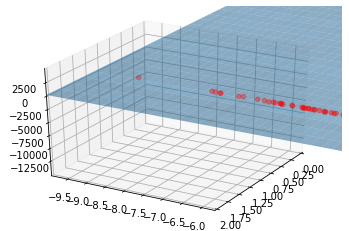

In [9]:
# %matplotlib qt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(azim=30)
xlim1,xlim2 = np.percentile(X[:,0],0.001)-1,np.percentile(X[:,0],0.9999)+1
ylim1,ylim2 = np.percentile(X[:,1],0.001)-1,np.percentile(X[:,1],0.9999)+1
zlim1,zlim2 = np.percentile(y,0.001)-5000,np.percentile(y,0.999)+5000
ax.set_xlim(xlim1,xlim2 )
ax.set_ylim(ylim1,ylim2)
ax.set_zlim(zlim1,zlim2)
ax.scatter(X[:,0], X[:,1], y,color='r') 
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

2. A Gradient Descent for Multiple Variables Linear Regression

In [34]:
theta = np.zeros([1,3])
alpha = 0.01
iters = 10000

In [44]:
def mse(X,y,theta):
    se = np.power((X.dot(theta.T)-y),2)
    return np.sum(se)/(2 * len(X))

def gradientdes(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X.dot(theta.T) - y), axis=0)
        cost[i] = mse(X, y, theta) 
    return theta

Beta2 = gradientdes(X,y,theta,iters,alpha).T
Beta2

array([[-19.37573602],
       [ -8.04369803],
       [ -1.76710985]])

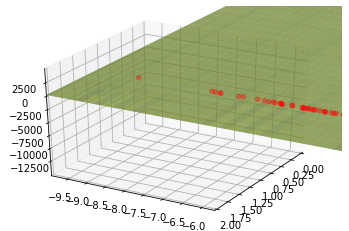

In [47]:
zs2 = Beta2[0][0] + xs*Beta2[1][0]  + ys*Beta2[2][0]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(azim=30)
ax.set_xlim(xlim1,xlim2 )
ax.set_ylim(ylim1,ylim2)
ax.set_zlim(zlim1,zlim2)
ax.scatter(X[:,0], X[:,1], y,color='r') 
ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.plot_surface(xs,ys,zs2, alpha=0.5,color = 'y')
plt.show()

In [46]:
zs2 = Beta2[0][0] + xs*Beta2[1][0]  + ys*Beta2[2][0]


In [49]:
%matplotlib qt
plt.show()